In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd '/content/drive/My Drive/ITAú/TCC/Pre-training Dataset'

/content/drive/My Drive/ITAú/TCC/Pre-training Dataset


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import os
import datetime

%matplotlib inline

## Creating Dataset

In [0]:
IMG_SIZE = 224

In [0]:
buildings = []
for root, dirs, files in os.walk('./Edificacoes'):
    for file in files:
        if file.endswith('.png'):
            buildings.append(cv2.imread(root+'/'+file))

background = []
for root, dirs, files in os.walk('./fundos'):
    for file in files:
        if file.endswith('.png'):
            background.append(cv2.imread(root+'/'+file)[:IMG_SIZE, :IMG_SIZE, :])


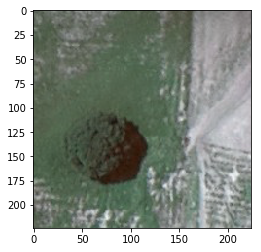

In [6]:
plt.imshow(background[0])

In [0]:
for i in range(500):
    bg_aux = background[random.randint(0,len(background)-1)].copy()
    mask = np.zeros((IMG_SIZE,IMG_SIZE))

    number_buildings = 1 if random.random() < 0.7 else 2  
    number_buildings = number_buildings if random.random() < 0.9 else 0

    for i in range(number_buildings):
        resize_scale = random.random()/10 + 0.95  # Image size between 95% and 105%
        img_aux = buildings[random.randint(0,len(buildings)-1)].copy()
        img_aux = cv2.resize(img_aux,(int(img_aux.shape[1]*resize_scale), int(img_aux.shape[0]*resize_scale)),interpolation=cv2.INTER_AREA)

        offset_x = random.randint(0,IMG_SIZE - img_aux.shape[1])
        offset_y = random.randint(0,IMG_SIZE - img_aux.shape[0])

        bg_aux[offset_y:offset_y+img_aux.shape[0], offset_x:offset_x+img_aux.shape[1]] = img_aux

        mask[offset_y:offset_y+img_aux.shape[0], offset_x:offset_x+img_aux.shape[1]] = 255

    name = str(datetime.datetime.now().timestamp()).replace('.', '')

    # plt.imshow(bg_aux)
    # plt.show()
    # plt.imshow(mask, cmap='gray')
    # plt.show()

    cv2.imwrite('./synthetic_dataset/imgs/'+name+'.png', bg_aux)
    cv2.imwrite('./synthetic_dataset/masks/'+name+'.png', mask)